In [89]:
# 数据一
import pandas as pd
df_transaction = pd.read_csv('ndm_transaction_list_20230705.csv')


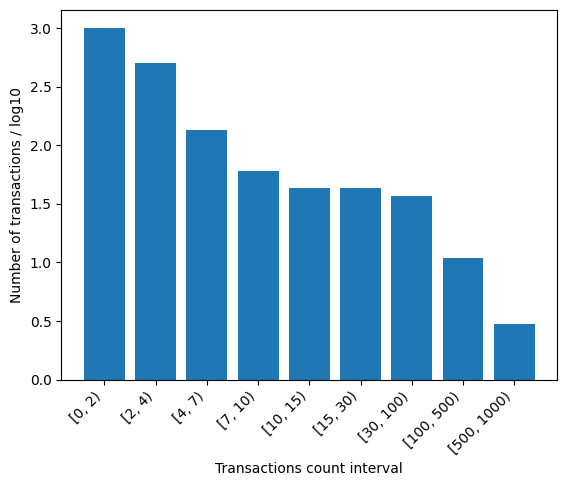

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# 根据现券的id进行归类计数，升序排列
bond_transactions = df_transaction.groupby('bond_cd').size().sort_values(ascending=False)

# 计算每个交易次数区间对应的品种数
bins = [0, 2, 4, 7, 10, 15, 30, 100, 500, 1000]  # 自定义交易次数区间
bond_transactions_intervals = pd.cut(bond_transactions, bins=bins, right=False).value_counts()

# 绘制柱状图
plt.bar(bond_transactions_intervals.index.astype(str), np.log10(bond_transactions_intervals.values))
plt.xlabel('Transactions count interval')
plt.ylabel('Number of transactions / log10')
# plt.title('每个交易次数区间对应的品种数分布')
plt.xticks(rotation=45, ha='right')  # 调整横轴标签角度和对齐方式
plt.show()


In [93]:
# 数据二
df = pd.read_csv('valuation_list_20230705.csv')
# 我的理解，对于估值数据来说，我们只关心交易度比较高的品种，所以虽然市场上有超过30000种债券，
# 但是可能关注的就是几百种，甚至几十种


3149


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_16147/2724076699.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.bar(bond_mkt_price_intervals.index.astype(str), np.log10(bond_mkt_price_intervals.values))


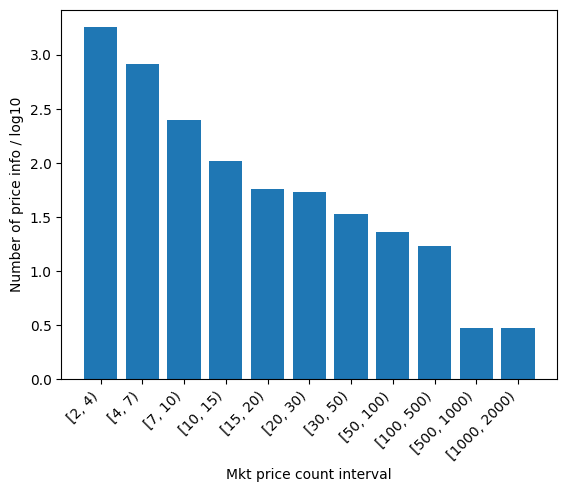

In [121]:
# 数据三
df_mkt_price_list = pd.read_csv('mkt_price_list_20230705.csv')
# 对每个产品进行归类聚合，按照时间先后进行排序
# 行情数据我们需要先对债券id（bond_cd）进行归类，然后按照行情时间（mkt_data_upd_tm）对数据进行排序

data_mkt_price_group = df_mkt_price_list.groupby("bond_cd").size().sort_values(ascending=True)
print(len(data_mkt_price_group))
# 3149 支票 有的行情多，有的行情少，这个应该是和成交次数挂钩的

# 计算每个交易次数区间对应的品种数
bins = [0, 2, 4, 7, 10, 15, 20, 30, 50, 100, 500, 1000, 2000]  # 自定义行情次数区间
bond_mkt_price_intervals = pd.cut(data_mkt_price_group, bins=bins, right=False).value_counts()

# 绘制柱状图
plt.bar(bond_mkt_price_intervals.index.astype(str), np.log10(bond_mkt_price_intervals.values))
plt.xlabel('Mkt price count interval')
plt.ylabel('Number of price info / log10')
# plt.title('每个交易次数区间对应的品种数分布')
plt.xticks(rotation=45, ha='right')  # 调整横轴标签角度和对齐方式
plt.show()
